In [1]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      import libraries
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata, UnivariateSpline
from matplotlib.pyplot import * # plotting library
import math
import pylab
from matplotlib import ticker
from mpmath import mp
import mpmath
from numpy import random



In [2]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})




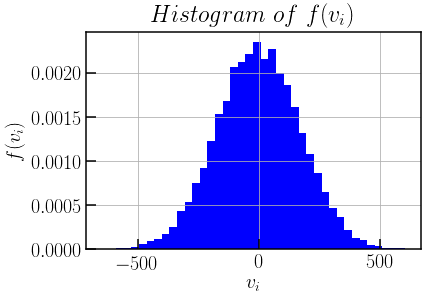

In [3]:
## Answer 2-1

ntest=20000
vidata=np.zeros(ntest)
m=85*1.66*1e-27
kb=1.38*1e-23
T=300

mu=0
sigma=(kb*T/m)**0.5

# Generate the data for N particles

for i in range(0,ntest):
    vidata[i]=random.normal(0,sigma)
    
#print "vidata=",vidata    
# plot the data
    
plt.hist(vidata, 40, density=True, facecolor='b')
plt.xlabel(r'$v_i$')
plt.ylabel(r'$f(v_i)$')
plt.title(r'$Histogram\ of\ f(v_i)$')
plt.tick_params(direction='in')
plt.grid(True)
plt.show()

In [4]:
from scipy.stats import skew
from scipy.stats import kurtosis

print 'skewness=',skew(vidata)
print 'kurtosis=',kurtosis(vidata)

skewness= -0.012121327038
kurtosis= -0.030104532936


The average is $0$ and the variance is $k_B T/m$. Both the skewness and the kurtosis are $0$ because the distribution is symmetric to its mean and it's a normal distribution.

In [5]:
## Answer 2-2

vdata=list(range(ntest)) # array of the total speed

vidata=list(range(3)) # array of velocity on each direction

for i in range(0,3):
    vidata[i]=list(range(ntest))
    for j in range(0,ntest):
        vidata[i][j]=np.random.normal(mu,sigma)

    
for i in range(0,ntest):
    vdata[i]=(vidata[0][i]**2+vidata[1][i]**2+vidata[2][i]**2)**0.5

## draw the fitting functions

xfit=np.arange(0,1000,5)
nfit=len(xfit)
yfit=list(range(nfit))
fac=m/(2*math.pi*kb*T)
for i in range(0,nfit):
    yfit[i]=fac**1.5*(4*math.pi*(xfit[i]**2))*(math.e**(-m*(xfit[i]**2)/(2*kb*T)))

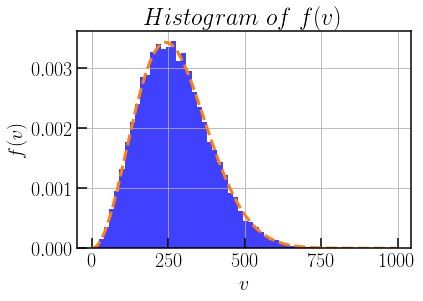

In [6]:
# plot the data
 
plt.hist(vdata, 50, density=True, facecolor='b', alpha=0.75)
plot(xfit,yfit,'--',lw=3)
plt.xlabel(r'$v$')
plt.ylabel(r'$f(v)$')
plt.title(r'$Histogram\ of\ f(v)$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.tick_params(direction='in')
plt.grid(True)
plt.show()

Analaytically, one can compute this distribution by computing $f(v,\theta,\phi)$ and then integrated over $\theta$ and $\phi$

In [7]:
## Answer 2-5

def ekdistribution(Tinput,Ninput):
    m=85*1.66*1e-27
    kb=1.38*1e-23
    mu=0
    sigma=(kb*Tinput/m)**0.5
    ekoutput=list(range(Ninput))
    for i in range(0,Ninput):
        ekoutput[i]=0
        for j in range(0,3):
            ekoutput[i]+=np.random.normal(mu,sigma)**2
        ekoutput[i]*=0.5*m
    return ekoutput

    

In [8]:
temperature=[10,50,100,300,600]
ekdata=list(range(5))
ekaverage=list(range(5))

for i in range(0,5):
    ekdata[i]=ekdistribution(temperature[i],20000)
    ekaverage[i]=sum(ekdata[i])/len(ekdata[i])
    

## fitting the factor \alpha
tfit=list(range(5))
for i in range(0,5):
    tfit[i]=temperature[i]*kb

alpha,cov=np.polyfit(tfit, ekaverage,1,cov=True)

print 'alpha=',alpha[0],'+/-',cov[0][0]**0.5

alpha= 1.5025328826968785 +/- 0.0029373461866213824


We find the value $\alpha$ around $3/2$. This fits with the equipartition theory that the kinetic energy on each direction contribution $1/2 k_B T$.

In [9]:
##  Answer 2-6

temperature=[10,50,100,300,600]
ekdata=list(range(5))
ekaverage=list(range(5))

for i in range(0,5):
    ekdata[i]=ekdistribution(temperature[i],500)
    ekaverage[i]=sum(ekdata[i])/len(ekdata[i])

## fitting the factor \alpha
tfit=list(range(5))
for i in range(0,5):
    tfit[i]=temperature[i]*kb

alpha,cov=np.polyfit(tfit, ekaverage,1,cov=True)

print 'alpha=',alpha[0],'+/-',cov[0][0]**0.5


alpha= 1.4546987661394415 +/- 0.007646132603786056


We find a value that is more far from $1.5$ and a larger errorbar. This is due to the fact that we use a much smaller test data number for our numerical experiment. The larger the number of test we did, the better we recover the properties of the true probability distribution.

In [10]:
##  Answer 2-7

ekdata=ekdistribution(300,20000)

In [11]:
print 'variance=',np.var(ekdata)/((kb*T)**2)

variance= 1.5105830390668382


This scales as $\sigma^2\simeq 1.5 (k_B T)^2$

In [12]:
from scipy.stats import skew
from scipy.stats import kurtosis

print 'skewness=',skew(ekdata)
print 'kurtosis=',kurtosis(ekdata)

skewness= 1.61424297877
kurtosis= 3.91370072284


The distribution $f(E_k)$ is asymmetric respected to its mean. The probablitity to find events far from the mean is larger than a normal distribution.